# Network Notes

In [2038]:
# good 160 unit *3 network
network_model = "func-26-1-9"
iter1 = 56
iter2 = 1490
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



generating sample data of length:  200 
seed sequence for generation starts at frame index:  60  (approx.  0 : 3 ) 
seed sequence length: 100 
generate with frame sequences: 2 
using generated frames as seed_seq: (1, 98, 13) 
using generated frames as seed_seq: (1, 98, 13) 
Generated multiple frames in one action: (1, 98, 13) 1 
Generated multiple frames in one action: (1, 98, 13) 1 
wrote frames:  2 
Training Iteration 951 
using full set of frames 
generating encoded output 

 285/1221 [======>.......................] - ETA: 26s - loss: 0.0759 - model_2_loss_1: 2.3805 - model_2_loss_2: 0.7943 - generator_TD_Dense_0_loss: 0.0759 - model_1_loss: 0.1987'


In [2039]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  950
num_iterations :  5000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
overlap_sequence :  1
seed_seq_len :  100
seq_step :  98
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'RMSprop', 'params': {'lr': 0.001}}
generate_len :  200
model_filename :  out/func-26-1-9/model-950.h5
frame_len_ms :  20


In [2040]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-26-1-9 Notes

2017-12-11 11:33:28

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Attempt to refine the decoder to improve autoencoder loss

At 200 stopped training encoder and decoder and started training generator.
Working with short corpus. At this point the encoder / decoder loss is at 0.68

At 430 stopped, changed the loss weights to 0.95 in favour of the 
generator before the decoder, since that loss had jumped (relative to itself)
during this training run.

At 510 stopped and changed the loss weights to 1.0 in favour of the 
generator to try and force the loss down further.

Return to weights at 200, correcting the generator of the 
next step encoded output. This was incorrectly generating the 
output of the generator, which of course then attempted to learn against
the values it had produced itself. Resolved this by adding a fourth output
which is the output of the encoder, which has learnt based on the 
autoencoder training at the first stage.

At 705 continue, but with generator getting 99% of the loss
weighting, splitting the relative losses more evenly.

At 866 switched to RMSprop. This had an immediate improvement in losses.

At 934 switched generator loss to mean absolute error and 100% weight.


In [2041]:
if model_type != 'functional':
  nd.model_config(network_model)

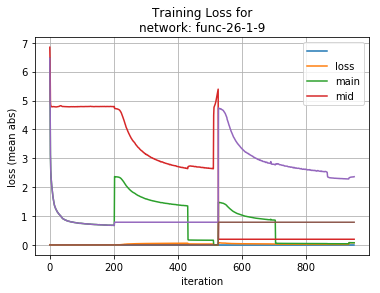

In [2042]:
nd.plot_training_loss(network_model, 'mean abs') 

In [2043]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_2_loss_1,model_2_loss_2,encoder_loss

0,0.0758747219991,0.0758747219991,0.196133552615,2.34955714508,0.78603485544
0,0.0758602732821,0.0758602732821,0.196133552615,2.35160483809,0.786034855217
0,0.0757676092549,0.0757676092549,0.196133552615,2.35183374313,0.786034855375
0,0.0757199993615,0.0757199993615,0.196133552615,2.35370008603,0.786034855096
0,0.0755919503913,0.0755919503913,0.196133552615,2.35241129146,0.786034855349
0,0.0756095416819,0.0756095416819,0.196133552615,2.35510596211,0.786034854755
0,0.0754747222789,0.0754747222789,0.196133552615,2.35563249003,0.7860348554
0,0.0754888705653,0.0754888705653,0.196133552615,2.35753062024,0.78603485466
0,0.0753533426279,0.0753533426279,0.196133552615,2.35573545394,0.786034854596
0,0.075443482629,0.075443482629,0.196133552615,2.3608161199,0.786034855439

950


Latest Iteration: 950
3200 rate codec



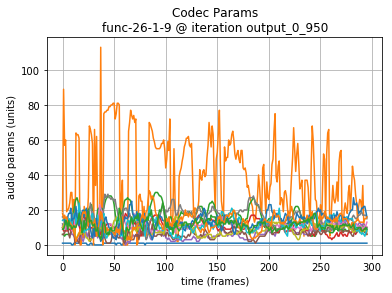

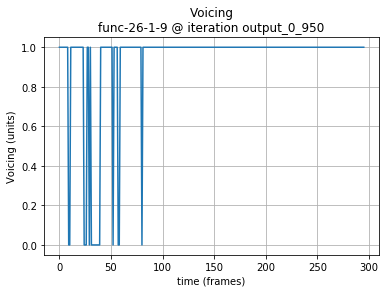

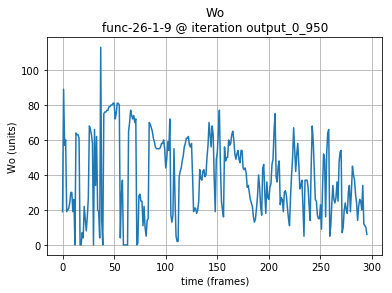

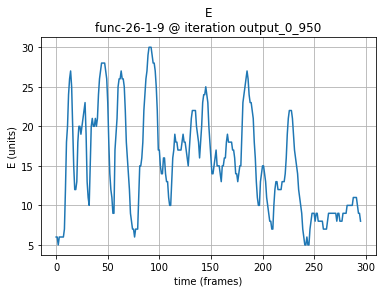

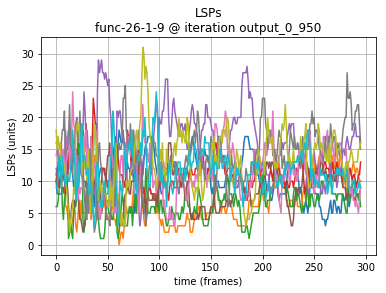

In [2044]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

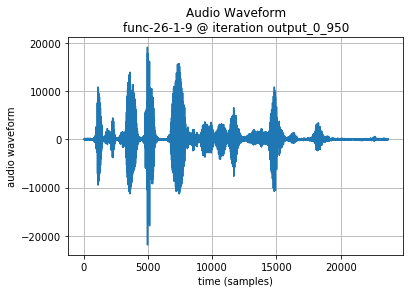

In [2045]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

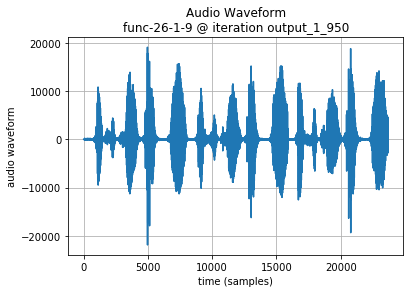

In [2046]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [2047]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

output_0_56


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-26-1-9/out-c2cb-output_0_56'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 